In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import all_estimators
from src.constants import MODEL_PATH
from src.data import Data
from src.evaluation import Evaluation
from src.explanation import report_model
from src.feature_engineering import FeatureEngineering, FeatureSelection
from src.genetic_algorithm import GeneticAlgorithm
from src.model import Model
from src.model_selection import ModelSelection
from src.preprocessing import DataPreprocessor

### Carregamento de Dados

In [3]:
data = Data()
essays = data.load()

### Pré-processamento

In [4]:
data_preprocessor = DataPreprocessor()
preprocessed_data = data_preprocessor.preprocess(essays)

### Extração de Features e Labels

In [5]:
feature_selection = FeatureSelection()
X, y = feature_selection.extract_features_and_labels(preprocessed_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Engenharia de Features

In [6]:
feature_engineering = FeatureEngineering("one_hot_encoding")
feature_engineering.fit(X_train)
X_train_transformed = feature_engineering.transform(X_train)
X_test_transformed = feature_engineering.transform(X_test)

### Seleção do Modelo

In [7]:
model = Model(model_class="RandomForestRegressor")
model.fit(X_train_transformed, y_train)
model.save(MODEL_PATH)

### Predição e Avaliação

Root Mean Squared Error: 2.021502780656855
Mean Absolute Error: 1.1946813559322038
R2 Score: 0.996056805671767


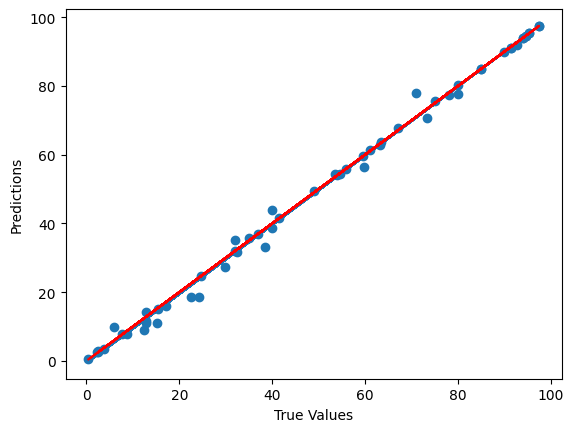

In [8]:
evaluation = Evaluation()
evaluation.report(y_test, model.predict(X_test_transformed))

### Relatório

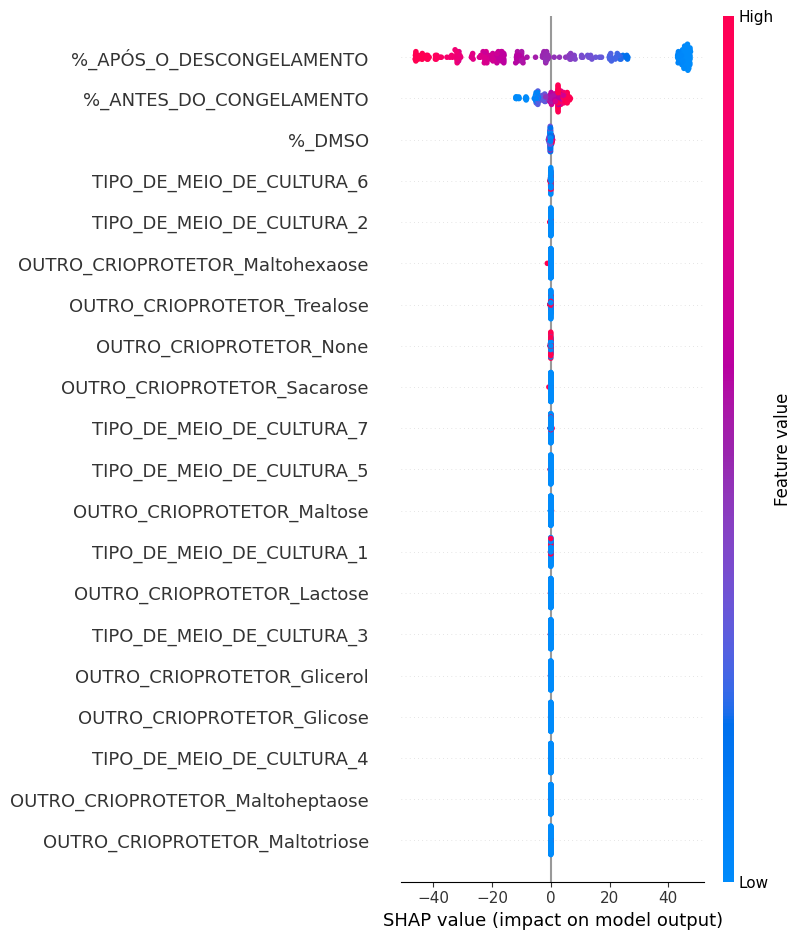

In [9]:
report_model(model, X_train_transformed)